In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame

## Exercise 1: Diatomic molecule

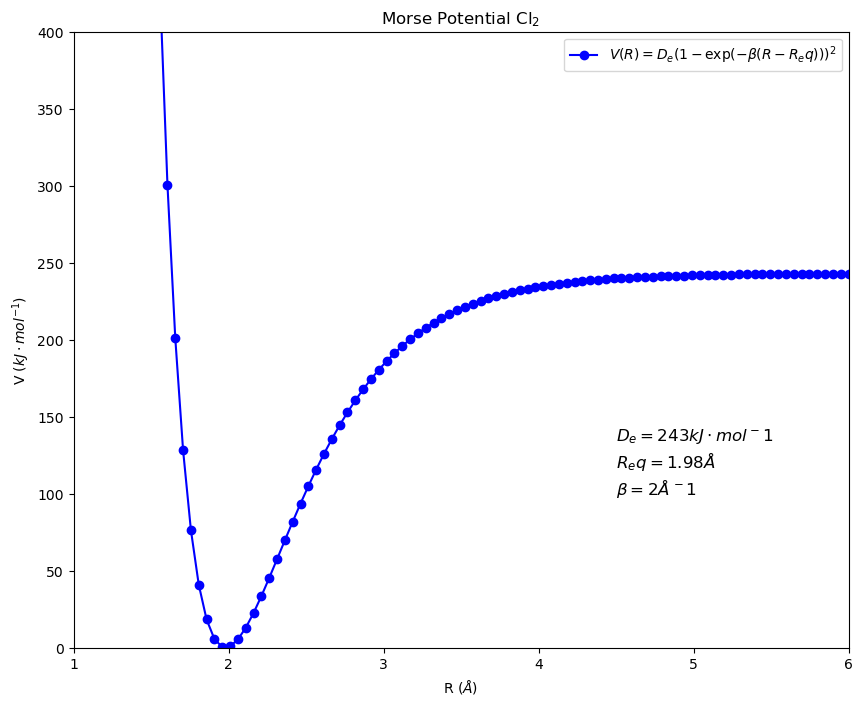

In [3]:

R = np.linspace(1, 6, 100)

# Parameters
R_eq = 1.98 # equilibrium radius (Angstrom)
D_e = 243 # potentiel well depth (kJ/mol)
beta = 2 # (Angstrom^-1)

V = D_e*(1 - np.exp(-beta*(R-R_eq)))**2

#Plot

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(R, V, c = "blue", marker="o", label=r"$V(R) = D_e(1-\exp(-\beta(R-R_eq)))^2$")
ax.set_xlabel("R ($\AA$)")
ax.set_ylabel("V ($kJ \cdot mol^{-1}$)")
ax.axis([1, 6, 0, 400])
plt.title("Morse Potential Cl$_2$")

# adding parameters to plot
plt.text(0.7, 0.3, 
         fr"$D_e = {D_e} kJ\cdot mol^{-1}$"+"\n"+fr"$R_eq = {R_eq} \AA $"+"\n"+fr"$\beta = {beta} \AA^{-1}$",
         horizontalalignment='left',
         verticalalignment='center',
         transform=ax.transAxes,
         fontsize=12)

plt.legend()
plt.savefig("figs/Morse_Potential_Cl$_2.png", dpi=300, bbox_inches="tight")
plt.show()



## Exercise 2 : Data retrieval and visualisation

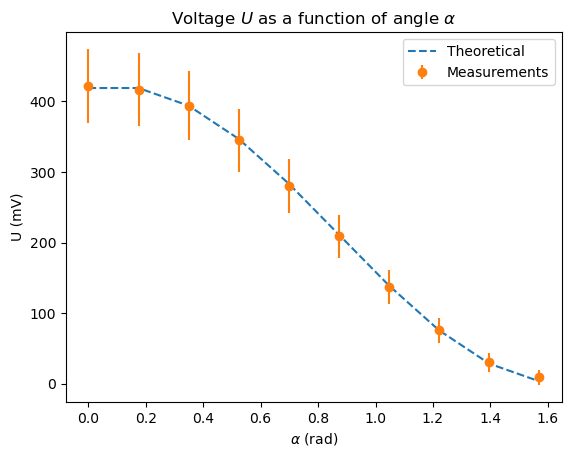

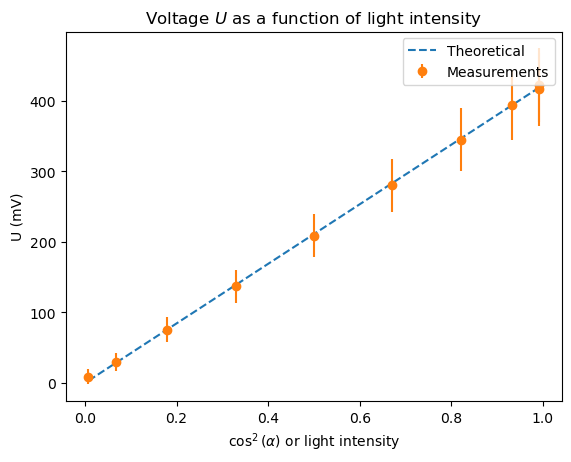

In [6]:
data = pd.read_csv('data/dataMalus.csv').to_numpy()
alpha, U = data.transpose()

a_0 = -5

# account for the systematic error

U_theo = U[0]*np.cos(np.deg2rad(alpha+a_0))**2
plt.plot(np.deg2rad(alpha), U_theo, label='Theoretical', linestyle="dashed")
#plt.plot(np.deg2rad(alpha), U, label="Measurements")

error = [(0.1*U[i] + 10.) for i in range(len(U))]
plt.errorbar(x=np.deg2rad(alpha),y=U, label="Measurements", yerr=error, fmt='o')
plt.legend()
plt.ylabel("U (mV)")
plt.xlabel(r"$\alpha$ (rad)")
plt.title(r"Voltage $U$ as a function of angle $\alpha$")
plt.show()

# don't forget about the systematic error !

cos_axis = np.cos(np.deg2rad(alpha+a_0))**2

# given the measurement angles, what does theory predict
plt.plot(cos_axis, U_theo, label='Theoretical', linestyle="dashed")

error = [(0.1*U[i] + 10.) for i in range(len(U))]
plt.errorbar(x=cos_axis,y=U, label="Measurements", yerr=error, fmt='o')
plt.legend()
plt.ylabel("U (mV)")
plt.xlabel(r"$\cos^2(\alpha)$ or light intensity")
plt.title(r"Voltage $U$ as a function of light intensity")
plt.show()


## Exercise 3: Disgusting weather in Seattle

(365, 4)

Summer data
total rain in  2014: 1232.799999999999 mm
total rain in summer 2014 (1st selection method): 73.8 mm
total rain in summer 2014 (2nd selection): 73.8 mm
The two method are equivalent

150
Rainy days in 2014 : 150
Even rainy days : 71


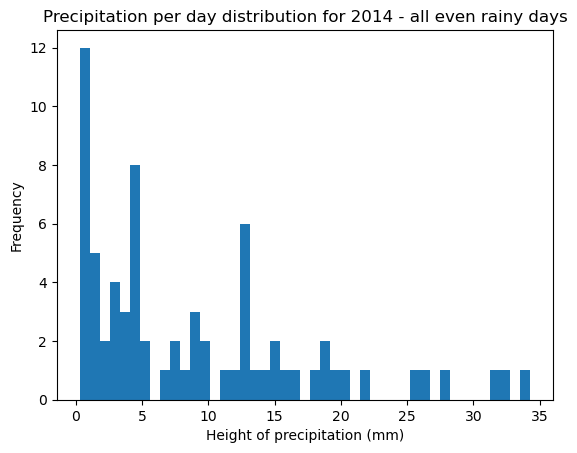

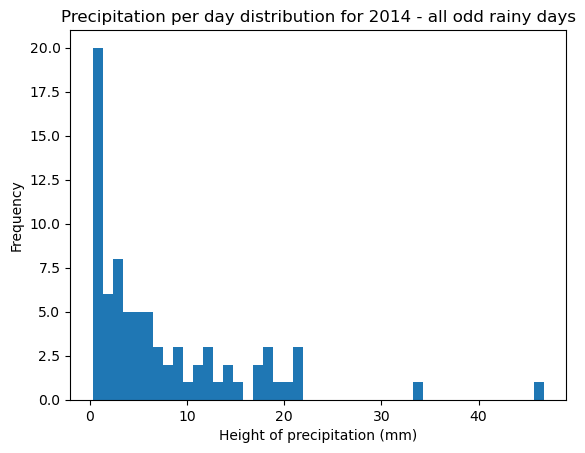

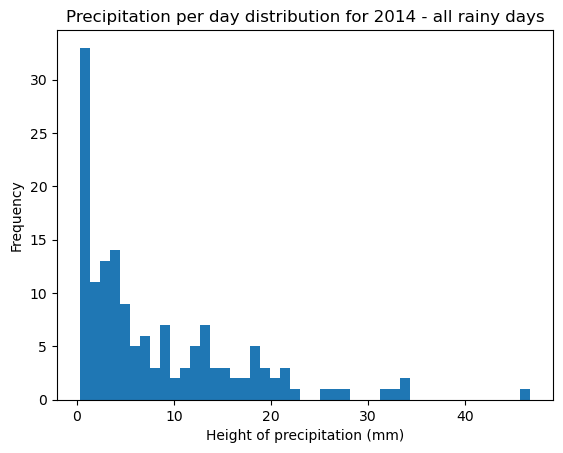

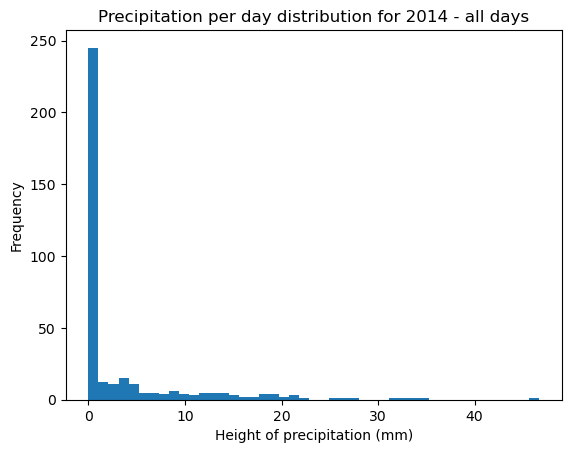

In [49]:
sedata = pd.read_csv('data/Seattle2014.csv').to_numpy()
unmodified = pd.read_csv('data/Seattle2014.csv')
STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03 = sedata.transpose()

#DATE
#PRCP
#TMAX
#TMIN

# they have weird measurement units, switch back to more standard ones
prcp = PRCP/10 # they measure in 0.1 mm

tmax = np.array(TMAX)
tmax = tmax/10#(tmax-32)*5/9 # they measurein 0.1 degrees C

tmin = np.array(TMIN)
tmin = tmin/10#(tmin-32)*5/9 # they measurein 0.1 degrees C




lessdata = [DATE, prcp, tmax, tmin]
table = DataFrame(np.transpose(lessdata), columns=['date', 'precipitation', 'tmax', 'tmin'])

#print(pd.read_csv('data/Seattle2014.csv')['TMAX'].describe())
#print()

# something weird with the format, pandas is interpreting the columns as object and not float

table = table.astype(float)

# get a look at the data
#print(table.describe())
#print(table)


#plt.scatter(table['date'], table['tmax'])




summervals = {"date": [], "precipitation": [], "tmax": [], "tmin": []}

print(table.shape)

# isolating summer period into seperate table

for i in range(table.shape[0]):
    # after 20th of June and before 23rd of September is summer
    if table['date'][i] >= 20140621 and table['date'][i] < 20140923 :
        summervals['date'].append(table['date'][i])
        summervals['precipitation'].append(table['precipitation'][i])
        summervals['tmax'].append(table['tmax'][i])
        summervals['tmin'].append(table['tmin'][i])


summer_table = DataFrame(summervals, columns=['date', 'precipitation', 'tmax', 'tmin'])
print("\nSummer data")

# characteristics of summer period

#print(summer_table.describe())

# total rain
print(f"total rain in  2014: {sum(table['precipitation'])} mm")

# better way to select rows with a condition
# the built-in option, likely faster
summer_table2 = table.loc[(table['date'] > 20140620) & (table['date'] < 20140923)]
#print(f"SUMMER TABLE 2 {summer_table2}")

# total rain 2
print(f"total rain in summer 2014 (1st selection method): {sum(summer_table['precipitation'])} mm")
print(f"total rain in summer 2014 (2nd selection): {sum(summer_table2['precipitation'])} mm")
# as wee see, both methods are equivalent
print("The two method are equivalent" if (sum(summer_table['precipitation'])==sum(summer_table2['precipitation'])) else "The two methods are not equivalent ")

print()

rainy_table = table.loc[(table['precipitation'] > 0.0)]
print(len(rainy_table))
print("Rainy days in 2014 :", len(rainy_table))

# get only the even days (so corresponding integer in YYYY/MM/DD format is even)




even_rainy_table = rainy_table.loc[(rainy_table['date'] % 2 == 0)]
odd_rainy_table = rainy_table.loc[(rainy_table['date'] % 2 == 1)]

print("Even rainy days :", len(even_rainy_table))


rainy_precip = rainy_table['precipitation'].to_numpy()
odd_precip = odd_rainy_table['precipitation'].to_numpy()
even_precip = even_rainy_table['precipitation'].to_numpy()
even_date = even_rainy_table['date'].to_numpy()

# quick check
#for e in even_date:
    #print(e)

# plotting the histogram

plt.hist(even_precip, bins=45)
plt.title("Precipitation per day distribution for 2014 - all even rainy days")
plt.xlabel("Height of precipitation (mm)")
plt.ylabel("Frequency")
plt.show()

plt.hist(odd_precip, bins=45)
plt.title("Precipitation per day distribution for 2014 - all odd rainy days")
plt.xlabel("Height of precipitation (mm)")
plt.ylabel("Frequency")
plt.show()


plt.hist(rainy_precip, bins=45)
plt.title("Precipitation per day distribution for 2014 - all rainy days")
plt.xlabel("Height of precipitation (mm)")
plt.ylabel("Frequency")
plt.show()




precip = table['precipitation'].to_numpy()
print()



# total area should add up to total precipitation
# cummulative frequency should add up to 365
plt.hist(precip, bins=45)
plt.title("Precipitation per day distribution for 2014 - all days")
plt.xlabel("Height of precipitation (mm)")
plt.ylabel("Frequency")
plt.show()


#print(serie.describe())

#print(type(unmodified))
#print(table.dtypes)

#print("test")
# example numbers
#dataset = pd.DataFrame(data=[2 ** 64, 2 ** 65, 2 ** 66], columns=['bignum'])
#print(dataset.describe())
